# Import Packages

In [ ]:
!pip install ydata-profiling
!pip install squarify

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
import squarify #for treemap

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9662b59fb2b6d37c2df305184d3caf7cb4da541c1148ccd52c8e9a91b4ebf65d
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


# 1. Understand Data

## 1.1. Load Dataset

In [ ]:
ecommerce = pd.read_csv('/content/drive/MyDrive/UNIGAP/Python/Final Project/ecommerce retail.xlsx - ecommerce retail.csv')
segmentation = pd.read_csv('/content/drive/MyDrive/UNIGAP/Python/Final Project/segmentation.csv')
df = ecommerce.copy()
df1 = segmentation.copy()

## 1.2. Check values and datatypes

In [ ]:
# Check datatypes
print(df.info())
# Check numerical data
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB
None
            Quantity     CustomerID
count  541909.000000  406829.000000
mean        9.552250   15287.690570
std       218.081158    1713.600303
min    -80995.000000   12346.000000
25%         1.000000   13953.000000
50%         3.000000   15152.000000
75%        10.000000   16791.000000
max     80995.000000   18287.000000


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


## 1.3. Deep dive into and deal with inproper datatypes and data values
- The datatypes of InvoiceNo, StockCode, Description, InvoiceDate, UnitPrice, CustomerID, Country is FALSE
- Why quantity has negative values?

### ***Datatypes***

In [ ]:
#StockCode, Description, Country, InvoiceNo -- Datatype: String
df = df.astype({'StockCode':'string', 'Description':'string', 'Country':'string', 'InvoiceNo': 'string'})

#InvoiceDate -- datetime
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')


In [ ]:
#UnitPrice -- float
df['UnitPrice'] = df['UnitPrice'].str.replace(',','.').astype('float')

In [ ]:
#CustomerID -- int64
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
 7   Country      541909 non-null  string        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), string(4)
memory usage: 33.6 MB
None


### ***Data values***
- Check the negative value and possible reasons
  + Quantity col has negative values
      - Đa số negative values ở cột Quantity là do đơn hàng bị cancel -> Drop các rows đó đi
  + UnitPrice has negative values -> drop  


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.0
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.69057
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.0
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.0
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.0
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.0
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.0
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# Check negative values in Quantity column
df[df['Quantity'] < 0]
  ## Almost negative value in Quantity col has InvoiceNo start with 'C' -> Check
check_cancel = df['InvoiceNo'].str.startswith('C')
negative_quan_cancel = df[(df['Quantity'] < 0) & (check_cancel == True)]
  ### other negative quantity
negative_quan_nocancel = df[(df['Quantity'] < 0) & (check_cancel == False)]


In [ ]:
#Check negative values in UnitPrice col
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom


In [ ]:
#Drop rows that cancel and has negative values in Quantity column
df = df[~((df['Quantity'] < 0) & (check_cancel == True))]
#Drop negative values in UnitPrice col
df = df[df['UnitPrice'] > 0]

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.0
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.0
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.0
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.0
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.0
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.0
std,155.524124,NaN,35.915681,1713.14156


# 2. Missing and Duplicate Data

## 2.1. Detect missing data

In [ ]:
check_null = pd.DataFrame(df.isnull().sum())
check_null['%missing'] = check_null[0] / len(df) * 100
check_null.columns = ['count', '%missing']
check_null # Missing many values in CustomerID column (~25%)

,count,%missing
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,132220,24.942275
Country,0,0.000000


**Check possible reasons for missing values in customerID column**

In [ ]:
check_missing = df.copy()
check_missing

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
## Check if missing CustomerIDs are related to cancelled transactions
cancelled = df[df['CustomerID'].isnull() & df['InvoiceNo'].str.startswith('C')]
print(cancelled)

## Check if missing CustomerIDs are linked to specific countries
missing_countries = df[df['CustomerID'].isnull()]['Country'].value_counts()
print("\nCountries with missing CustomerID:\n", missing_countries)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

Countries with missing CustomerID:
 Country
United Kingdom    130802
EIRE                 654
Hong Kong            284
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                1
Name: count, dtype: Int64


In [ ]:
check_missing['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
# Count missing CustomerID per month
missing_by_month = check_missing[check_missing['CustomerID'].isnull()]['MonthYear'].value_counts().sort_index()
print(missing_by_month)

MonthYear
2010-12    15323
2011-01    13077
2011-02     7178
2011-03     8628
2011-04     6454
2011-05     7844
2011-06     8792
2011-07    11820
2011-08     7476
2011-09     9233
2011-10     9750
2011-11    18838
2011-12     7807
Freq: M, Name: count, dtype: int64


**Nhận xét**
1. Missing values chỉ nằm ở col CustomersID
2. CustomerID bị thiếu k lquan đến đơn hàng bị huỷ
3. Phần lớn missing values nằm ở thị trường UK

## 2.2. Check duplicated data

In [ ]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


## 2.3. Dealing with missing and duplicate data
- Missing values: Only customerID is missing -> Doing RFM model need to group based on CustomerID --> Drop 25% missing value in CustomerID col
- Duplicate data: drop duplicated rows

In [ ]:
# Missing values
df = df.dropna(subset=['CustomerID'])
# Duplicated rows
df_clean = df.drop_duplicates().copy()
df_clean.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# 3. Data Processing

## 3.1. Calculate RFM

In [ ]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
df_clean['Date'] = df_clean['InvoiceDate'].dt.normalize()
df_clean['MonthYear'] = df_clean['InvoiceDate'].dt.to_period('M')
df_clean['Cost'] = df_clean['Quantity']*df_clean['UnitPrice']
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,MonthYear,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09,2011-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09,2011-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,2011-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,2011-12,16.60


In [ ]:
# Define last day in dataset
last_day = df_clean['Date'].max()

# Create RFM dataframe
RFM_df = df_clean.groupby('CustomerID').agg(
    Recency=('Date', lambda x: last_day - x.max()),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('Cost', 'sum'),
    Start_day=('Date', 'min')
).reset_index()

RFM_df['Recency'] = RFM_df['Recency'].dt.days.astype('int16')
RFM_df['Recency_reverse'] = -RFM_df['Recency']
RFM_df['Start_Month'] = RFM_df['Start_day'].apply(lambda x: x.replace(day=1))
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,Start_day,Recency_reverse,Start_Month
0,12346,325,1,77183.60,2011-01-18,-325,2011-01-01
1,12347,2,7,4310.00,2010-12-07,-2,2010-12-01
2,12348,75,4,1797.24,2010-12-16,-75,2010-12-01
3,12349,18,1,1757.55,2011-11-21,-18,2011-11-01
4,12350,310,1,334.40,2011-02-02,-310,2011-02-01


## 3.2. RFM_score

- Meaning of customers segment based on RFM_score
1. Champions: bought recently, buy often and spend the most
2. Loyal:
3. Potential Loyalist:
4. New Customers
5. Promising:
6. Need Attention:
7. About to Sleep
8. At Risk: Customers who have spent a lot but whose buying frequency has decreased significantly.
9. Cannot Lose Them: Customers who used to shop frequently and spend a lot but haven’t purchased recently.
10. Hibernating customers: Long-time customers who haven’t made purchases in a while.
11. Lost customers

In [ ]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       4338 non-null   Int64         
 1   Recency          4338 non-null   int16         
 2   Frequency        4338 non-null   int64         
 3   Monetary         4338 non-null   float64       
 4   Start_day        4338 non-null   datetime64[ns]
 5   Recency_reverse  4338 non-null   int16         
 6   Start_Month      4338 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](2), float64(1), int16(2), int64(1)
memory usage: 190.8 KB


In [ ]:
#Calculate RFM score
RFM_df['R_score'] = pd.qcut(RFM_df['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(str)
RFM_df['F_score'] = pd.qcut(RFM_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(str)
RFM_df['M_score'] = pd.qcut(RFM_df['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(str)
RFM_df['RFM_score'] = RFM_df['R_score'] + RFM_df['F_score'] + RFM_df['M_score']
RFM_df

,CustomerID,Recency,Frequency,Monetary,Start_day,Recency_reverse,Start_Month,R_score,F_score,M_score,RFM_score
0,12346,325,1,77183.60,2011-01-18,-325,2011-01-01,1,1,5,115
1,12347,2,7,4310.00,2010-12-07,-2,2010-12-01,5,5,5,555
2,12348,75,4,1797.24,2010-12-16,-75,2010-12-01,2,4,4,244
3,12349,18,1,1757.55,2011-11-21,-18,2011-11-01,4,1,4,414
4,12350,310,1,334.40,2011-02-02,-310,2011-02-01,1,1,2,112
...,...,...,...,...,...,...,...,...,...,...,...
4333,18280,277,1,180.60,2011-03-07,-277,2011-03-01,1,2,1,121
4334,18281,180,1,80.82,2011-06-12,-180,2011-06-01,1,2,1,121
4335,18282,7,2,178.05,2011-08-05,-7,2011-08-01,5,3,1,531
4336,18283,3,16,2045.53,2011-01-06,-3,2011-01-01,5,5,4,554


In [ ]:
#Segment Customers
segment = pd.read_csv('/content/drive/MyDrive/UNIGAP/Python/Final Project/segmentation.csv')
segment['RFM Score'] = segment['RFM Score'].str.split(',')
# Tách array của RFM score
segment = segment.explode('RFM Score').reset_index().drop(columns=['index'])
segment

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [ ]:
#Mapping with RFM_df
RFM_df['RFM_score'] = RFM_df['RFM_score'].astype(str).str.strip()
segment['RFM Score'] = segment['RFM Score'].astype(str).str.strip()
RFM_df_merge = RFM_df.merge(segment, left_on='RFM_score', right_on='RFM Score', how='left')
RFM_df_merge

,CustomerID,Recency,Frequency,Monetary,Start_day,Recency_reverse,Start_Month,R_score,F_score,M_score,RFM_score,Segment,RFM Score
0,12346,325,1,77183.60,2011-01-18,-325,2011-01-01,1,1,5,115,Cannot Lose Them,115
1,12347,2,7,4310.00,2010-12-07,-2,2010-12-01,5,5,5,555,Champions,555
2,12348,75,4,1797.24,2010-12-16,-75,2010-12-01,2,4,4,244,At Risk,244
3,12349,18,1,1757.55,2011-11-21,-18,2011-11-01,4,1,4,414,Promising,414
4,12350,310,1,334.40,2011-02-02,-310,2011-02-01,1,1,2,112,Lost customers,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280,277,1,180.60,2011-03-07,-277,2011-03-01,1,2,1,121,Lost customers,121
4334,18281,180,1,80.82,2011-06-12,-180,2011-06-01,1,2,1,121,Lost customers,121
4335,18282,7,2,178.05,2011-08-05,-7,2011-08-01,5,3,1,531,Potential Loyalist,531
4336,18283,3,16,2045.53,2011-01-06,-3,2011-01-01,5,5,4,554,Champions,554


# 4. Visualizations

## 4.1. Distribution of R,F,M
- Nhận xét:
  + Từ Distribution của Recency: Majority of customers are recent purchasers -- also long tail of customers not purchased for long time (in-active customers)
  + Từ distribution của Frequency: Majority purchased only 1-2 times, very few customers buy repeatedly -- low customers retention rate (Key weakness)
  + Từ distribution của Monetary: Most customers spend small amounts.


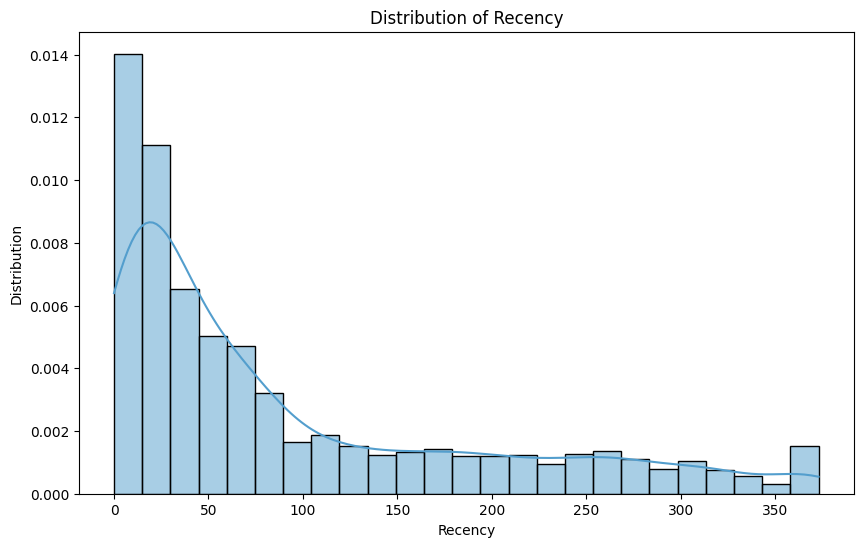

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
color=sns.color_palette('Blues')[3]
sns.histplot(RFM_df_merge['Recency'], ax=ax, kde=True, stat='density', color = color , edgecolor='black')  # add binwidth
ax.set(xlabel='Recency', ylabel='Distribution', title='Distribution of Recency')
plt.show()

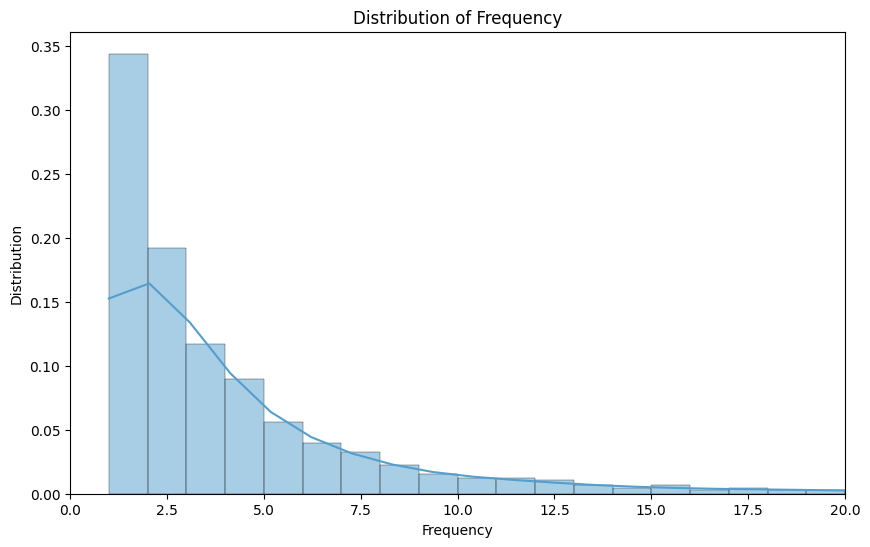

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
color=sns.color_palette('Blues')[3]
sns.histplot(RFM_df_merge['Frequency'], ax=ax, kde=True, stat='density',
             binwidth=1, color = color , edgecolor='black')  # add binwidth
ax.set(xlabel='Frequency', ylabel='Distribution', xlim=(0, 20), title='Distribution of Frequency')
plt.show()

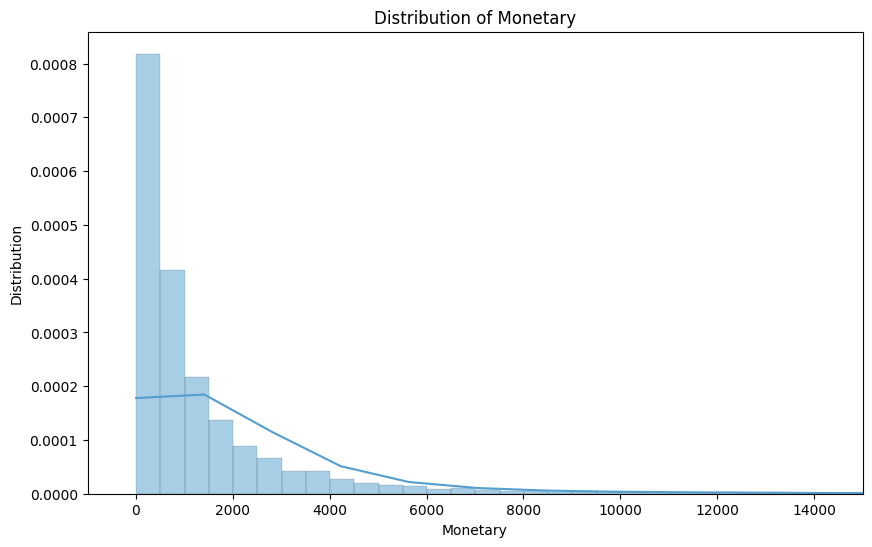

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
color=sns.color_palette('Blues')[3]
sns.histplot(RFM_df_merge['Monetary'], ax=ax, kde=True, stat='density',color = color , edgecolor='black', binwidth = 500)  # add binwidth
ax.set(xlabel='Monetary', ylabel='Distribution', xlim = (-1000,15000), title='Distribution of Monetary')
plt.show()

## 4.2. Treemap based on 11 Customers segments

<ipython-input-31-235ea24c4eac>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(data=RFM_df_merge,


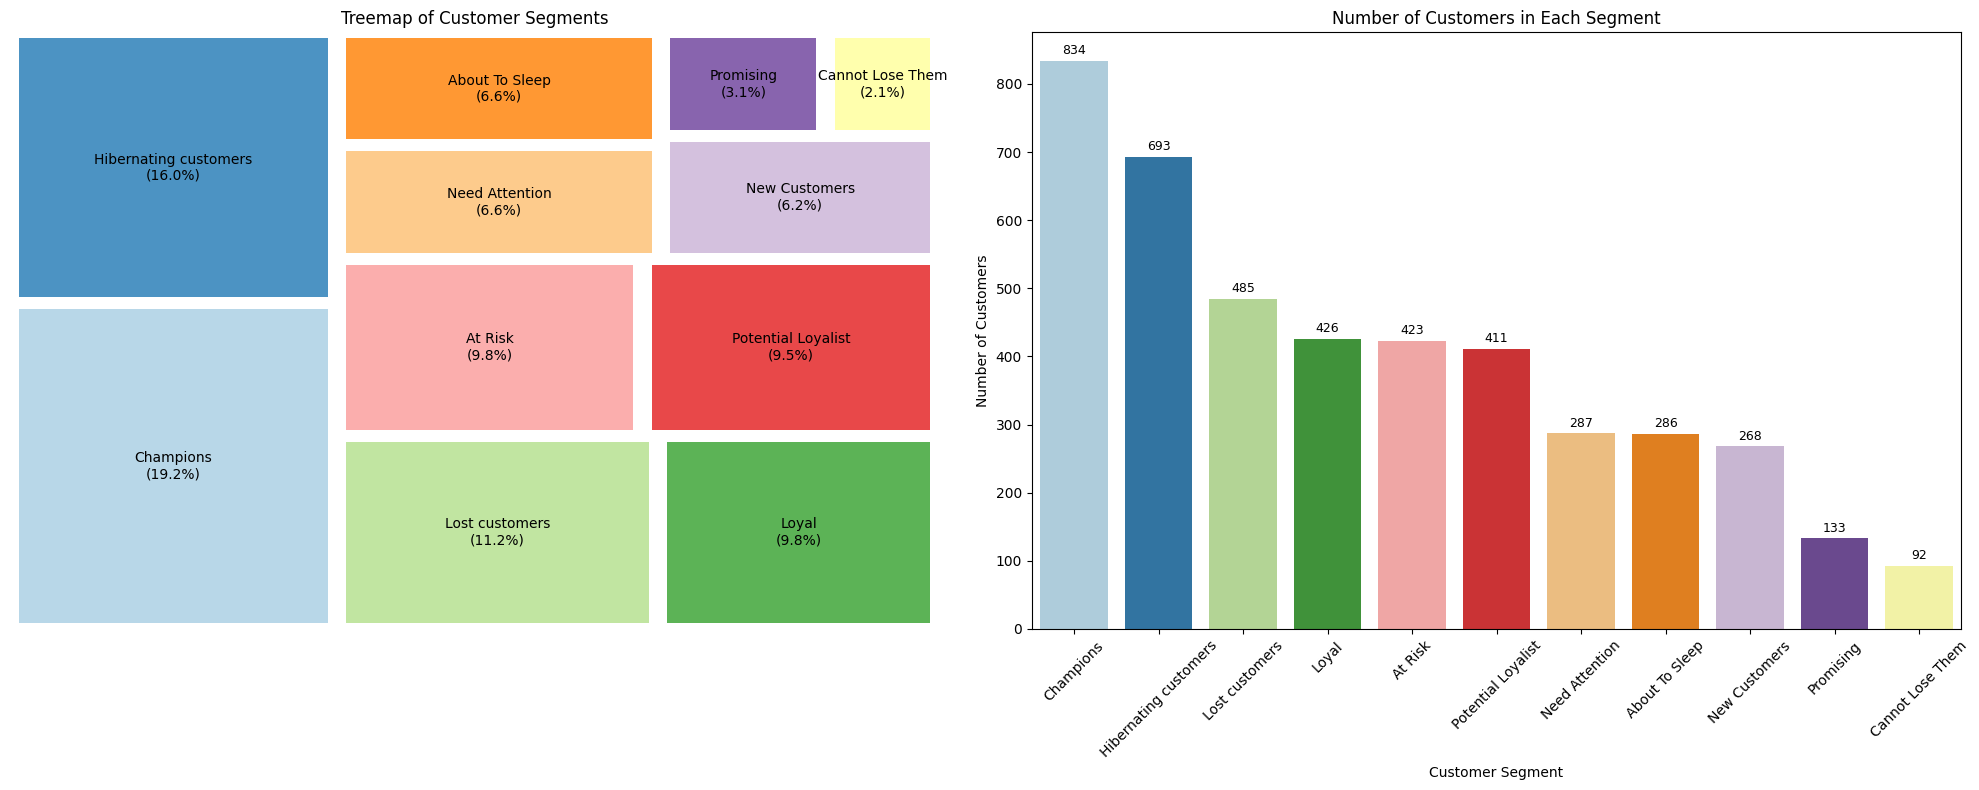

In [ ]:
segment_counts = RFM_df_merge['Segment'].value_counts()
total = segment_counts.sum()
labels = [f"{seg}\n({count*100/total:.1f}%)"
          for seg, count in zip(segment_counts.index, segment_counts.values)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# Left: Treemap
squarify.plot(sizes=segment_counts.values,
              label=labels,
              color=sns.color_palette('Paired'),
              pad=True,
              alpha=0.8,
              ax=axes[0])
axes[0].set_title('Treemap of Customer Segments')
axes[0].axis('off')

#Right: Bar Chart
bar = sns.countplot(data=RFM_df_merge,
                    x='Segment',
                    order=segment_counts.index,
                    palette='Paired',
                    ax=axes[1])
axes[1].set_title('Number of Customers in Each Segment')
axes[1].set_xlabel('Customer Segment')
axes[1].set_ylabel('Number of Customers')
axes[1].tick_params(axis='x', rotation=45)

# Add data labels
for p in bar.patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2,
                 height + 10,
                 f'{height:.0f}',
                 ha='center',
                 fontsize=9)

plt.tight_layout()
plt.show()

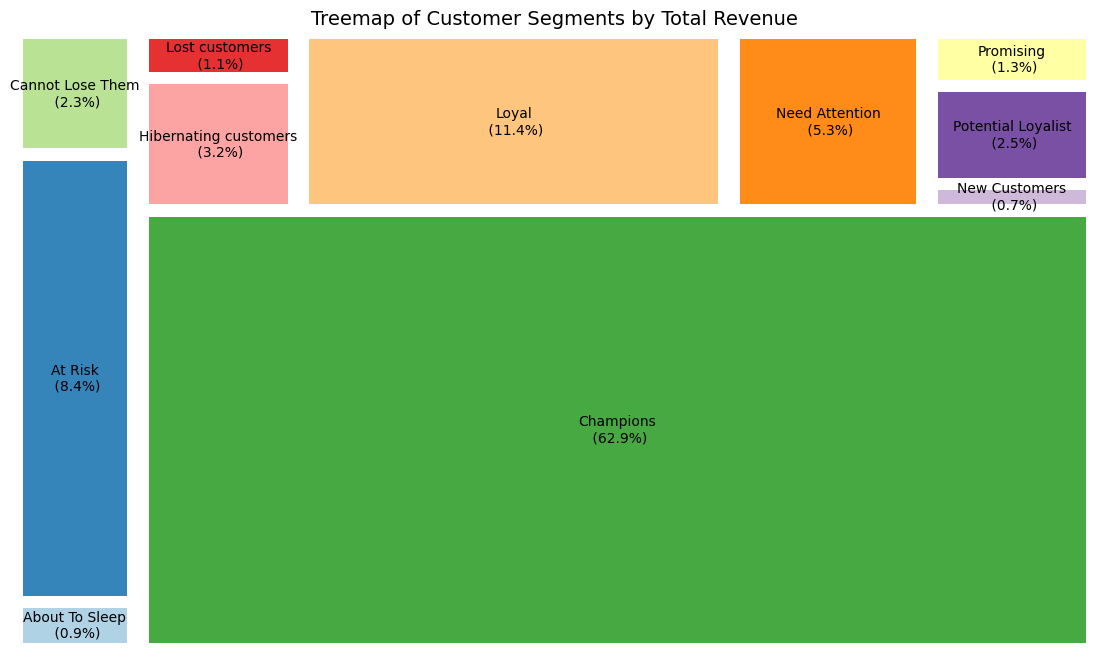

In [ ]:
Monetary_total = RFM_df_merge.groupby('Segment')['Monetary'].sum()

# Tính tổng Monetary toàn bộ
total = RFM_df_merge['Monetary'].sum()

# Tạo labels với % đóng góp
labels = [f"{seg}\n ({count*100/total:.1f}%)"
          for seg, count in zip(Monetary_total.index, Monetary_total.values)]

# Treemap
plt.figure(figsize=(14, 8))
squarify.plot(
    sizes=Monetary_total.values,
    label=labels,
    color=sns.color_palette('Paired'),
    pad=True,
    alpha=0.9
)
plt.title('Treemap of Customer Segments by Total Revenue', fontsize=14)
plt.axis('off')
plt.show()

## 4.3. Recommendation for Marketing Campaign
**Divide 11 customers segments into 3 smaller groups based on their behavior**
1. Loyal & VIP Customers: Champions, Loyal (R&F_score = 4/5; Contribute apprxml 75% of total revenue)
2. Potential Customers: Potential Loyalist, Promising, Need Attention, New Customers (R&F score moderate->high 2,3,4,5 -- lower share of revenue but strong potential)
3. At Risk & Lost Customers: At Risk, Cannot Lose Them, Hibernating Customers, Lost Customers, About To Sleep (low recency score -> haven't purchased for long time)

In [ ]:
def regroup_segment(segment):
    if segment in ['Champions', 'Loyal']:
        return 'Loyal & VIP Customers'
    elif segment in ['Potential Loyalist', 'New Customers', 'Promising', 'Need Attention']:
        return 'Potential Customers'
    else:
        return 'At Risk & Lost Customers'

RFM_df_merge['Customer_Group'] = RFM_df_merge['Segment'].apply(regroup_segment)
RFM_df_merge

,CustomerID,Recency,Frequency,Monetary,Start_day,Recency_reverse,Start_Month,R_score,F_score,M_score,RFM_score,Segment,RFM Score,Customer_Group
0,12346,325,1,77183.60,2011-01-18,-325,2011-01-01,1,1,5,115,Cannot Lose Them,115,At Risk & Lost Customers
1,12347,2,7,4310.00,2010-12-07,-2,2010-12-01,5,5,5,555,Champions,555,Loyal & VIP Customers
2,12348,75,4,1797.24,2010-12-16,-75,2010-12-01,2,4,4,244,At Risk,244,At Risk & Lost Customers
3,12349,18,1,1757.55,2011-11-21,-18,2011-11-01,4,1,4,414,Promising,414,Potential Customers
4,12350,310,1,334.40,2011-02-02,-310,2011-02-01,1,1,2,112,Lost customers,112,At Risk & Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280,277,1,180.60,2011-03-07,-277,2011-03-01,1,2,1,121,Lost customers,121,At Risk & Lost Customers
4334,18281,180,1,80.82,2011-06-12,-180,2011-06-01,1,2,1,121,Lost customers,121,At Risk & Lost Customers
4335,18282,7,2,178.05,2011-08-05,-7,2011-08-01,5,3,1,531,Potential Loyalist,531,Potential Customers
4336,18283,3,16,2045.53,2011-01-06,-3,2011-01-01,5,5,4,554,Champions,554,Loyal & VIP Customers


<ipython-input-39-998d83c6eb0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=RFM_df_merge, x='Customer_Group', palette='Set2')


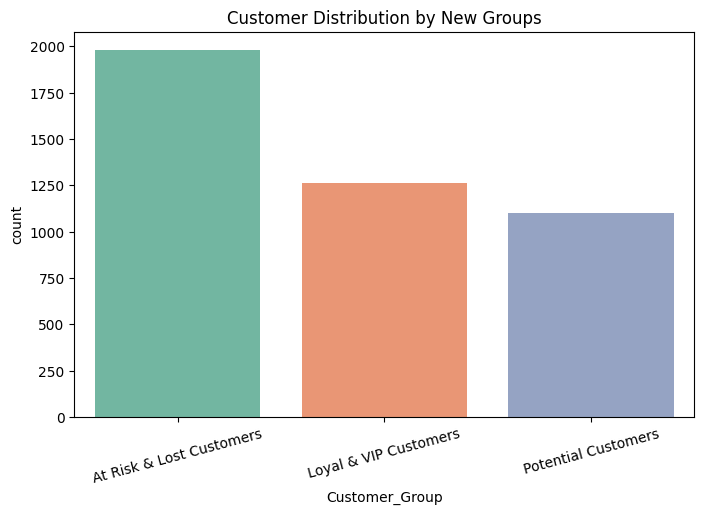

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=RFM_df_merge, x='Customer_Group', palette='Set2')
plt.title('Customer Distribution by New Groups')
plt.xticks(rotation=15)
plt.show()

**Nhận xét**
1. Gratitude Campaign mainly on the Loyal & VIP Customers group: bcz they have highest RFM scores, contributes around 75% revenue, purchase behavior is stable and frequent, they are most likely to respond positively to gratitude campaigns and loyalty incentives
- How?: Appreciate, offer exclusive rewards, personalize experience (by tracking top products they often buy to provide exclusive product package vouchers), strengthen loyalty
2. 2nd group can be included in the campaign: A gratitude campaign can help nurture and encourage them to buy more regularly
"Thank you and keep shopping" approach, convert them into loyal customers
3. Not recommend to run MKT campaign for 3rd group: not cost-effective and low conversion rates

## 4.4. Dig deeper into each group of customers

### 4.4.1. Correlation btw R,F,M of each groups
- Loyal & VIP Customers: Frequency vs Monetary: Strong positive correlation (0.55)
- No strong relation in R,F,M score of 2nd and 3rd group

<Axes: >

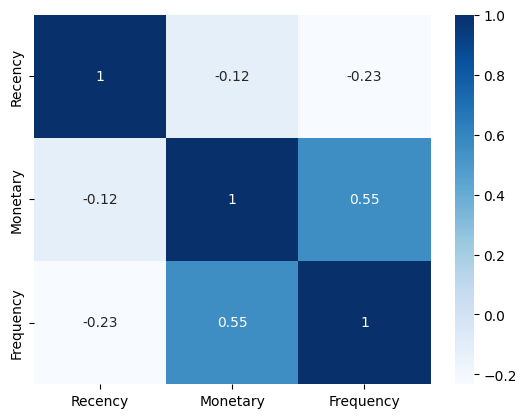

In [ ]:
# Loyal and VIP Customers group
cols = ['Recency','Monetary', 'Frequency']
sns.heatmap(RFM_df_merge[cols][RFM_df_merge['Customer_Group'].isin(['Loyal & VIP Customers'])].corr(), annot=True, cmap='Blues')

<Axes: >

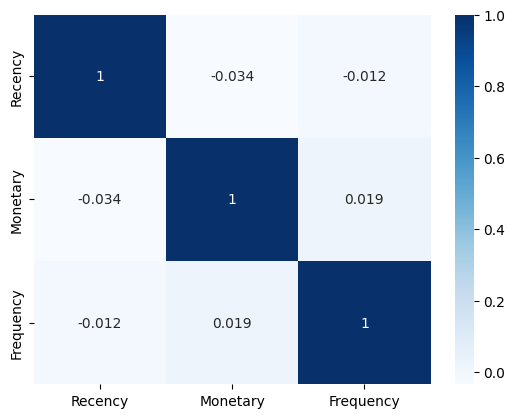

In [ ]:
#Potential Customers group
cols = ['Recency','Monetary', 'Frequency']
sns.heatmap(RFM_df_merge[cols][RFM_df_merge['Customer_Group'].isin(['Potential Customers'])].corr(), annot=True, cmap='Blues')

<Axes: >

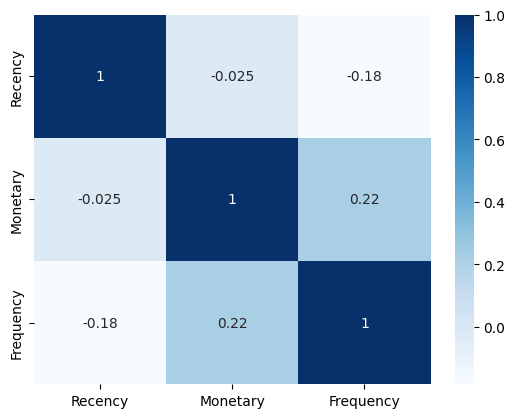

In [ ]:
#At Risk & Lost Customers
cols = ['Recency','Monetary', 'Frequency']
sns.heatmap(RFM_df_merge[cols][RFM_df_merge['Customer_Group'].isin(['At Risk & Lost Customers'])].corr(), annot=True, cmap='Blues')

### 4.4.2. Scatterplot Frequency vs Monetary (only for Loyal & VIP Customers)

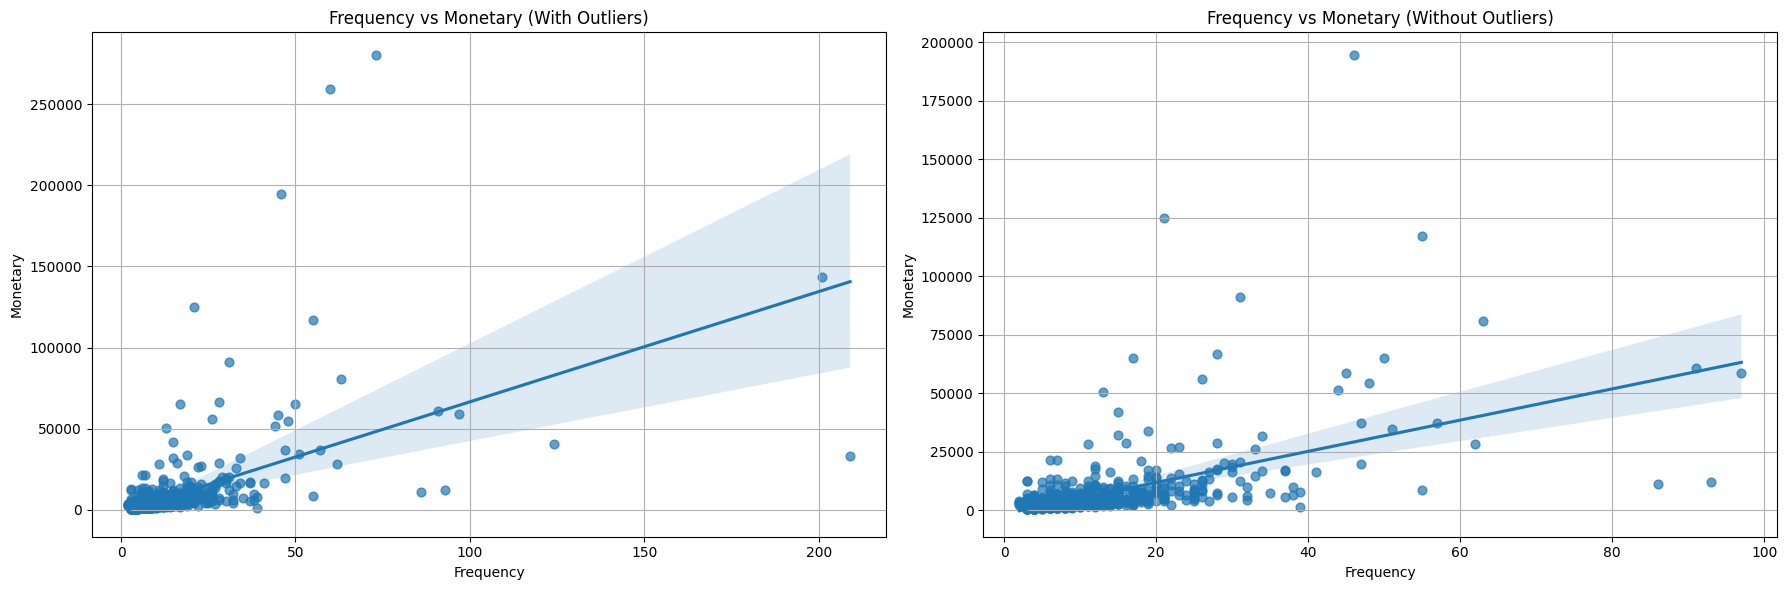

In [ ]:
# Filter data
vip_df = RFM_df_merge[RFM_df_merge['Customer_Group'] == 'Loyal & VIP Customers']
filtered_df = vip_df[(vip_df['Frequency'] < 100) & (vip_df['Monetary'] < 200000)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Left plot - With outliers
sns.regplot(
    data=vip_df,
    x='Frequency',
    y='Monetary',
    scatter_kws={'alpha': 0.7, 's': 40},
    ax=axes[0]
)
axes[0].set_title('Frequency vs Monetary (With Outliers)')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Monetary')
axes[0].grid(True)

# Right plot - Without outliers
sns.regplot(
    data=filtered_df,
    x='Frequency',
    y='Monetary',
    scatter_kws={'alpha': 0.7, 's': 40},
    ax=axes[1]
)
axes[1].set_title('Frequency vs Monetary (Without Outliers)')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Monetary')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 4.5. Potential customers -> Loyal customers
- Trong 4 customer segments thuộc potential customers group, nhóm nào nên tập trung vào yếu tố gì, cách tiếp cận ntn để chuyển thành loyal customers???

In [ ]:
#mean, median of segments except at risk and lost customers
comparison_df = RFM_df_merge[RFM_df_merge['Customer_Group'] != 'At Risk & Lost Customers']
comparison_summary = comparison_df.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'median']).reset_index()
comparison_summary.columns = ['_'.join(col).strip('_') for col in comparison_summary.columns.values]
comparison_summary['AOV_mean'] = comparison_summary['Monetary_mean'] / comparison_summary['Frequency_mean']
comparison_summary['AOV_median'] = comparison_summary['Monetary_median'] / comparison_summary['Frequency_median']
comparison_summary

,Segment,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,AOV_mean,AOV_median
0,Champions,10.841727,8.0,12.128297,8.0,6704.590779,2984.345,552.805607,373.043125
1,Loyal,36.049296,36.5,5.326291,5.0,2383.689296,1616.800,447.532675,323.360000
2,Need Attention,32.954704,30.0,3.108014,3.0,1627.834812,931.020,523.754026,310.340000
3,New Customers,27.828358,24.0,1.070896,1.0,222.667649,199.640,207.926585,199.640000
4,Potential Loyalist,26.282238,22.0,2.513382,2.0,538.708005,553.440,214.335905,276.720000
5,Promising,24.654135,16.0,1.330827,1.0,895.485113,664.110,672.878644,664.110000


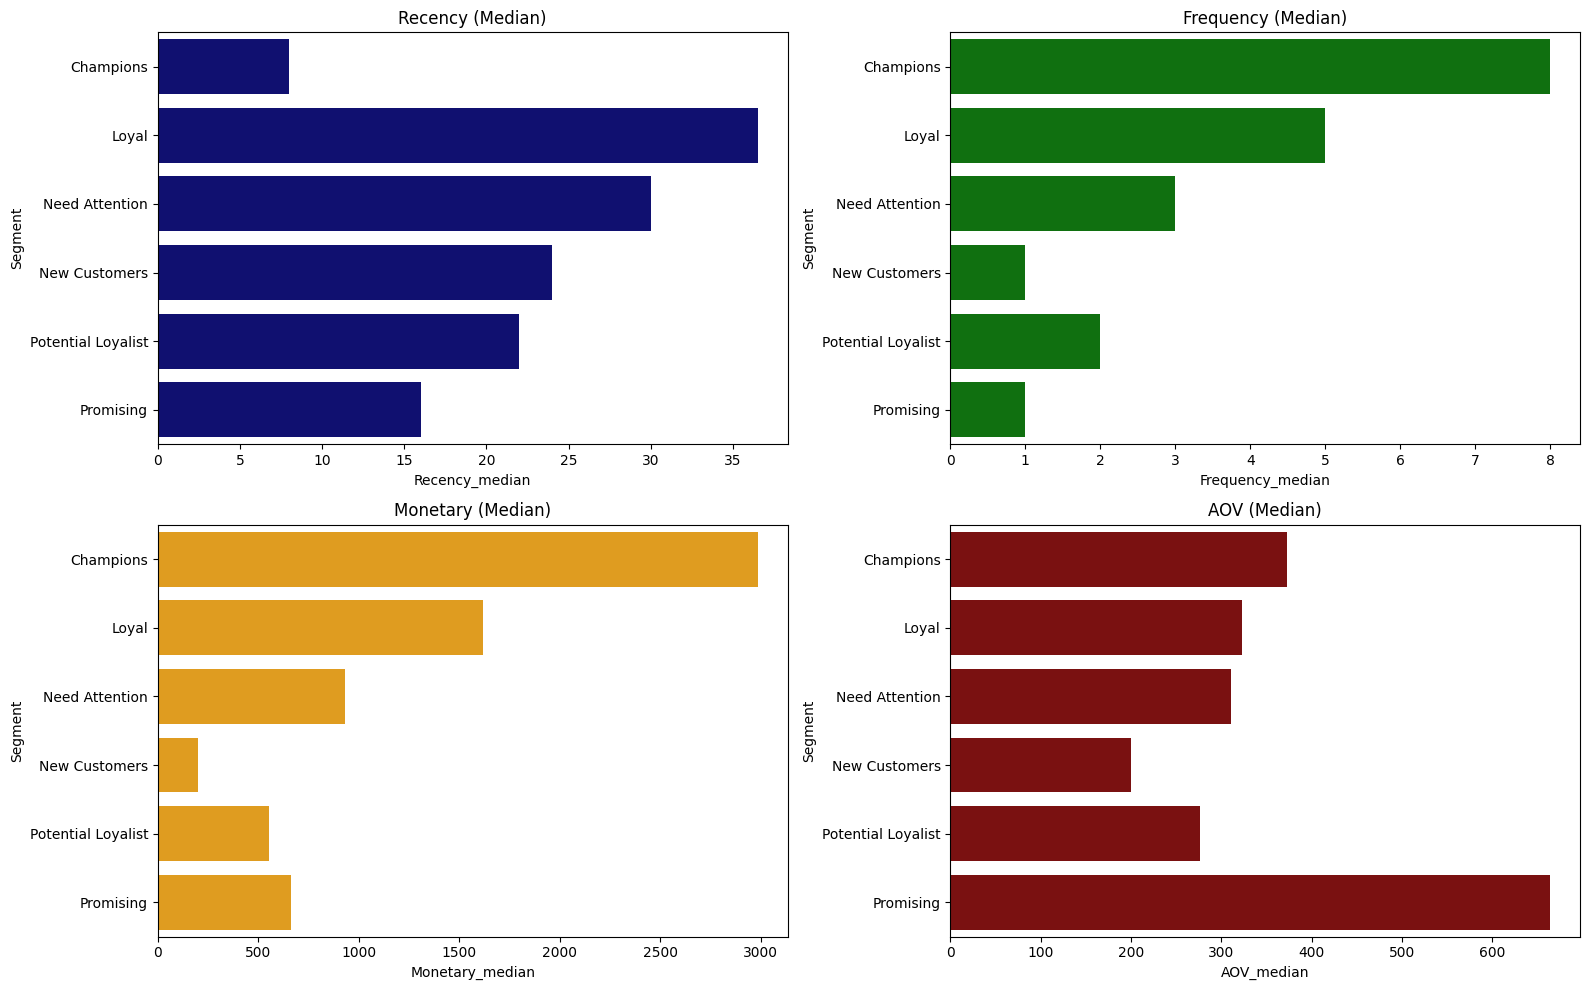

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.barplot(x='Recency_median', y='Segment', data=comparison_summary, ax=axes[0, 0], color='navy').set(title='Recency (Median)')
sns.barplot(x='Frequency_median', y='Segment', data=comparison_summary, ax=axes[0, 1], color='green').set(title='Frequency (Median)')
sns.barplot(x='Monetary_median', y='Segment', data=comparison_summary, ax=axes[1, 0], color='orange').set(title='Monetary (Median)')
sns.barplot(x='AOV_median', y='Segment', data=comparison_summary, ax=axes[1, 1], color='darkred').set(title='AOV (Median)')
plt.tight_layout()
plt.show()

**Recommendations**
